data_adjust (168, 15)
data_adjust.T (15, 168)
index [ 0  1  2  3  4  5  6  7  8  9 12 11 10 13 14]
type <class 'list'>
finaldata (168, 3)
reconMat (168, 15)
               x6            y6            z6
0    2.041241e+02 -4.493180e+00 -2.523082e+00
1    1.921987e+02 -1.370986e+01 -9.750779e+00
2    3.007665e+01 -3.816381e+01 -9.485292e+00
3   -1.890236e+02 -9.656292e+00 -4.448737e+00
4   -3.743909e+01 -2.248439e+01 -8.216850e+00
5    4.280791e+01  1.036306e+01  9.873604e+00
6   -1.614400e+02  2.220221e+01 -5.165590e+00
7   -1.977149e+02 -5.428992e+00  5.254719e+00
8   -4.181902e-18 -2.089075e-18  1.152870e-18
9    1.791498e+02 -9.038120e+00  1.042063e+01
10  -1.996187e+02 -1.283719e+01 -2.686721e+00
11   1.545356e+00 -6.565896e+00 -2.423563e+01
12   4.163572e+01 -3.427719e+01  4.597302e+00
13   5.704233e+01 -2.926654e+00  5.518666e+00
14  -6.994456e+01 -4.535433e+00  1.668261e+01
15  -4.985096e+01 -5.746311e+00  9.427571e+00
16   7.161084e+01  3.559943e+01  1.662488e+01
17  -1.927277e+

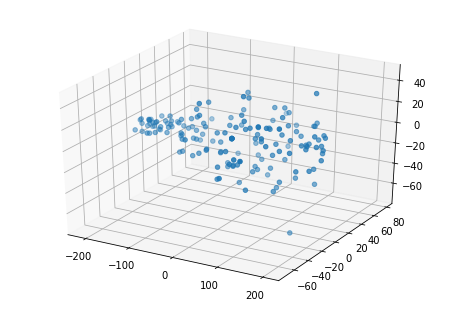

In [50]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

#计算均值,要求输入数据为numpy的矩阵格式，行表示样本数，列表示特征    
def meanX(dataX):
    return np.mean(dataX,axis=0)#axis=0表示按照列来求均值，如果输入list,则axis=1


#计算方差,传入的是一个numpy的矩阵格式，行表示样本数，列表示特征    
def variance(X):
    m, n = np.shape(X)
    mu = meanX(X)
    muAll = np.tile(mu, (m, 1))    
    X1 = X - muAll
    variance = 1./m * np.diag(X1.T * X1)
    return variance

#标准化,传入的是一个numpy的矩阵格式，行表示样本数，列表示特征    
def normalize(X):
    m, n = np.shape(X)
    mu = meanX(X)
    muAll = np.tile(mu, (m, 1))    
    X1 = X - muAll
    X2 = np.tile(np.diag(X.T * X), (m, 1))
    XNorm = X1/X2
    return XNorm

# """
# 参数：
# 	- XMat：传入的是一个numpy的矩阵格式，行表示样本数，列表示特征    
# 	- k：表示取前k个特征值对应的特征向量
# 返回值：
# 	- finalData：参数一指的是返回的低维矩阵，对应于输入参数二
# 	- reconData：参数二对应的是移动坐标轴后的矩阵
# """  
def pca(XMat, k):
    average = meanX(XMat) 
    m, n = np.shape(XMat)
    data_adjust = []
    avgs = np.tile(average, (m, 1))
    data_adjust = XMat - avgs
    print('data_adjust', data_adjust.shape)
    print('data_adjust.T', data_adjust.T.shape)
#     numpy中的cov函数用于求协方差矩阵，参数rowvar很重要！若rowvar=0，说明传入的数据一行代表一个样本，若非0，说明传入的数据一列代表一个样本。
#     因为newData每一行代表一个样本，所以将rowvar设置为0。covMat=np.cov(newData,rowvar=0)  
    covX = np.cov(data_adjust.T)   #计算协方差矩阵
#     调用numpy中的线性代数模块linalg中的eig函数，可以直接由covMat求得特征值和特征向量
    featValue, featVec=  np.linalg.eig(covX)  #求解协方差矩阵的特征值和特征向量
#     print('covX', covX)
#     第三步得到了特征值向量eigVals，假设里面有m个特征值，我们可以对其排序，排在前面的n个特征值所对应的特征向量就是我们要保留的，
#     它们组成了新的特征空间的一组基n_eigVect。
#     将零均值化后的数据乘以n_eigVect就可以得到降维后的数据。
    index = np.argsort(-featValue) #按照featValue进行从大到小排序
    print('index', index)
    finalData = []
    if k > n:
        print ("k must lower than feature number")
        return
    else:
        #注意特征向量时列向量，而numpy的二维矩阵(数组)a[m][n]中，a[1]表示第1行值
        selectVec = np.matrix(featVec.T[index[:k]]) #所以这里需要进行转置
        finalData = data_adjust * selectVec.T 
        reconData = (finalData * selectVec) + average  #重构数据
    return finalData, reconData

def loaddata(datafile):
#     file = pd.read_csv(datafile,sep="\t",header=-1)
#     print(file)
    return np.array(pd.read_csv(datafile,sep="\t",header=-1)).astype(np.float)


def plotBestFit(data1, data2):	  
    dataArr1 = np.array(data1)
    dataArr2 = np.array(data2)
    
    m = np.shape(dataArr1)[0]
    axis_x1 = []
    axis_y1 = []
    axis_x2 = []
    axis_y2 = []
    for i in range(m):
        axis_x1.append(dataArr1[i,0])
        axis_y1.append(dataArr1[i,1])
        axis_x2.append(dataArr2[i,0]) 
        axis_y2.append(dataArr2[i,1])				  
    fig = plt.figure()
    ax = fig.add_subplot(111)
    ax.scatter(axis_x1, axis_y1, s=50, c='red', marker='s')
    ax.scatter(axis_x2, axis_y2, s=50, c='blue')
    plt.xlabel('x1'); plt.ylabel('x2');
    plt.savefig("outfile.png")
    plt.show()	
    
def plot3D(data):
    fig = plt.figure()
    ax = Axes3D(fig)
    x = data[:,0]
    y = data[:,1]
    z = data[:,2]
    ax.scatter(x,y,z)
    plt.show()

#简单测试
#数据来源：http://www.cnblogs.com/jerrylead/archive/2011/04/18/2020209.html
def test():
    X = [[2.5, 0.5, 2.2, 1.9, 3.1, 2.3, 2, 1, 1.5, 1.1],
         [2.4, 0.7, 2.9, 2.2, 3.0, 2.7, 1.6, 1.1, 1.6, 0.9]]
    XMat = np.matrix(X).T  
    k = 3
    return pca(XMat, k)

#根据数据集data.txt
def main():    
    datafile = "processData/18Value.txt"
#     datafile = 'dataFake.txt'
    XMat = loaddata(datafile)
#     print('xMAt', XMat)
    k = 3
    return pca(XMat, k)
    
if __name__ == "__main__":
    finalData, reconMat = main()
    print('type', type(finalData.tolist()))
    print('finaldata', finalData.shape)
    print('reconMat', reconMat.shape)
#     print('finaldata', finalData)
    coordination = ['x6', 'y6', 'z6']
    test=pd.DataFrame(columns=coordination,data=finalData.tolist())
    print(test)
    test.to_csv('./AfterPCAData/18value.csv')
    plot3D(finalData)
#     plotBestFit(finalData, reconMat)